In [660]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.cluster import KMeans
from keras.preprocessing.sequence import TimeseriesGenerator
from IPython.display import Image,display


#plt.rcdefaults() # get the default theme

# for ignoring warnings
import warnings
warnings.simplefilter("ignore")

In [661]:
#Loading Data
df1=pd.read_csv("challenge_data.csv")
df2=pd.read_csv('challenge_annotation.csv')

##### Exploratory data Analysis

In [662]:
# display top of dataframe
df1.head(),df2.head()

(     Unnamed: 0      BDEP        TPO          HL     BHT  RPM  TOR      DEPT  \
 0  1.607131e+12  5063.135  19.548731  522.503986  18.982  0.0  0.0  5795.817   
 1  1.607131e+12  5063.135  15.586150  523.159986  19.068  0.0  0.0  5795.817   
 2  1.607131e+12  5062.959  18.492043  524.441986  19.164  0.0  0.0  5795.817   
 3  1.607131e+12  5062.959  16.114494  525.053986  19.249  0.0  0.0  5795.817   
 4  1.607131e+12  5062.778  17.699526  526.081986  19.347  0.0  0.0  5795.817   
 
      WOB  
 0  13.38  
 1  12.73  
 2  11.45  
 3  10.84  
 4   9.81  ,
      Unnamed: 0 Annotation
 0  1.607131e+12  off_slips
 1  1.607131e+12   on_slips
 2  1.607131e+12  off_slips
 3  1.607131e+12   on_slips
 4  1.607131e+12  off_slips)

In [663]:
# display bottom of dataframe
df1.tail(),df2.tail()

(         Unnamed: 0      BDEP  TPO          HL     BHT  RPM  TOR      DEPT  \
 40668  1.607151e+12  3055.453  0.0  358.541991  24.768  0.0  0.0  5795.817   
 40669  1.607151e+12  3055.453  0.0  358.595991  24.856  0.0  0.0  5795.817   
 40670  1.607151e+12  3055.453  0.0  358.605991  24.940  0.0  0.0  5795.817   
 40671  1.607151e+12  3055.281  0.0  358.411991  25.038  0.0  0.0  5795.817   
 40672  1.607151e+12  3055.281  0.0  357.757991  25.123  0.0  0.0  5795.817   
 
         WOB  
 40668  2.46  
 40669  2.40  
 40670  2.39  
 40671  2.59  
 40672  3.24  ,
        Unnamed: 0 Annotation
 104  1.607150e+12  off_slips
 105  1.607151e+12   on_slips
 106  1.607151e+12  off_slips
 107  1.607151e+12   on_slips
 108  1.607151e+12  off_slips)

In [664]:
#Renaming Columns
df1.rename(columns = {'Unnamed: 0':'Timestamp'}, inplace = True)
df2.rename(columns = {'Unnamed: 0':'Timestamp'}, inplace = True)
df1,df2

(          Timestamp      BDEP        TPO          HL     BHT  RPM  TOR  \
 0      1.607131e+12  5063.135  19.548731  522.503986  18.982  0.0  0.0   
 1      1.607131e+12  5063.135  15.586150  523.159986  19.068  0.0  0.0   
 2      1.607131e+12  5062.959  18.492043  524.441986  19.164  0.0  0.0   
 3      1.607131e+12  5062.959  16.114494  525.053986  19.249  0.0  0.0   
 4      1.607131e+12  5062.778  17.699526  526.081986  19.347  0.0  0.0   
 ...             ...       ...        ...         ...     ...  ...  ...   
 40668  1.607151e+12  3055.453   0.000000  358.541991  24.768  0.0  0.0   
 40669  1.607151e+12  3055.453   0.000000  358.595991  24.856  0.0  0.0   
 40670  1.607151e+12  3055.453   0.000000  358.605991  24.940  0.0  0.0   
 40671  1.607151e+12  3055.281   0.000000  358.411991  25.038  0.0  0.0   
 40672  1.607151e+12  3055.281   0.000000  357.757991  25.123  0.0  0.0   
 
            DEPT    WOB  
 0      5795.817  13.38  
 1      5795.817  12.73  
 2      5795.817  11

In [665]:
# Merging the dataframes based on the common column
df=pd.concat([df1,df2])
df

,Timestamp,BDEP,TPO,HL,BHT,RPM,TOR,DEPT,WOB,Annotation
0,1.607131e+12,5063.135,19.548731,522.503986,18.982,0.0,0.0,5795.817,13.38,NaN
1,1.607131e+12,5063.135,15.586150,523.159986,19.068,0.0,0.0,5795.817,12.73,NaN
2,1.607131e+12,5062.959,18.492043,524.441986,19.164,0.0,0.0,5795.817,11.45,NaN
3,1.607131e+12,5062.959,16.114494,525.053986,19.249,0.0,0.0,5795.817,10.84,NaN
4,1.607131e+12,5062.778,17.699526,526.081986,19.347,0.0,0.0,5795.817,9.81,NaN
...,...,...,...,...,...,...,...,...,...,...
104,1.607150e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,off_slips
105,1.607151e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,on_slips
106,1.607151e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,off_slips
107,1.607151e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,on_slips


In [666]:
# drop unwanted  columns, since both RPM and TOR values are Zero
df.drop(['RPM','TOR',],axis=1,inplace=True)

In [667]:
df

,Timestamp,BDEP,TPO,HL,BHT,DEPT,WOB,Annotation
0,1.607131e+12,5063.135,19.548731,522.503986,18.982,5795.817,13.38,NaN
1,1.607131e+12,5063.135,15.586150,523.159986,19.068,5795.817,12.73,NaN
2,1.607131e+12,5062.959,18.492043,524.441986,19.164,5795.817,11.45,NaN
3,1.607131e+12,5062.959,16.114494,525.053986,19.249,5795.817,10.84,NaN
4,1.607131e+12,5062.778,17.699526,526.081986,19.347,5795.817,9.81,NaN
...,...,...,...,...,...,...,...,...
104,1.607150e+12,NaN,NaN,NaN,NaN,NaN,NaN,off_slips
105,1.607151e+12,NaN,NaN,NaN,NaN,NaN,NaN,on_slips
106,1.607151e+12,NaN,NaN,NaN,NaN,NaN,NaN,off_slips
107,1.607151e+12,NaN,NaN,NaN,NaN,NaN,NaN,on_slips


In [668]:
# Information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40782 entries, 0 to 108
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Timestamp   40782 non-null  float64
 1   BDEP        40673 non-null  float64
 2   TPO         40660 non-null  float64
 3   HL          40671 non-null  float64
 4   BHT         40658 non-null  float64
 5   DEPT        40651 non-null  float64
 6   WOB         40651 non-null  float64
 7   Annotation  109 non-null    object 
dtypes: float64(7), object(1)
memory usage: 2.8+ MB


In [669]:
#Statistical summary of data
df.describe()

,Timestamp,BDEP,TPO,HL,BHT,DEPT,WOB
count,4.078200e+04,40673.000000,40660.000000,40671.000000,40658.000000,4.065100e+04,40651.000000
mean,1.607141e+12,4128.110895,6.970594,322.494967,20.995525,5.795817e+03,109.278085
std,5.871748e+06,566.009203,35.477067,157.447630,13.364818,1.538884e-09,155.015235
min,1.607131e+12,3055.281000,0.000000,80.455998,1.694000,5.795817e+03,-10.760000
25%,1.607136e+12,3636.986000,0.000000,97.413997,7.635000,5.795817e+03,1.760000
50%,1.607141e+12,4179.829000,0.000000,394.129990,22.199000,5.795817e+03,6.600000
75%,1.607146e+12,4610.241000,0.000000,445.305988,33.103250,5.795817e+03,293.090000
max,1.607151e+12,5063.135000,204.469157,528.517986,39.987000,5.795817e+03,451.030000


In [670]:
#Dimensions of the dataset
df.shape

(40782, 8)

In [671]:
#convert the Timestamp Column to Datetime
df['DateTime'] = pd.to_datetime(df['Timestamp'])

In [672]:
df.head()

,Timestamp,BDEP,TPO,HL,BHT,DEPT,WOB,Annotation,DateTime
0,1.607131e+12,5063.135,19.548731,522.503986,18.982,5795.817,13.38,NaN,1970-01-01 00:26:47.130720314
1,1.607131e+12,5063.135,15.586150,523.159986,19.068,5795.817,12.73,NaN,1970-01-01 00:26:47.130720822
2,1.607131e+12,5062.959,18.492043,524.441986,19.164,5795.817,11.45,NaN,1970-01-01 00:26:47.130721329
3,1.607131e+12,5062.959,16.114494,525.053986,19.249,5795.817,10.84,NaN,1970-01-01 00:26:47.130721838
4,1.607131e+12,5062.778,17.699526,526.081986,19.347,5795.817,9.81,NaN,1970-01-01 00:26:47.130722346


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015F35990D60>,
      dtype=object)

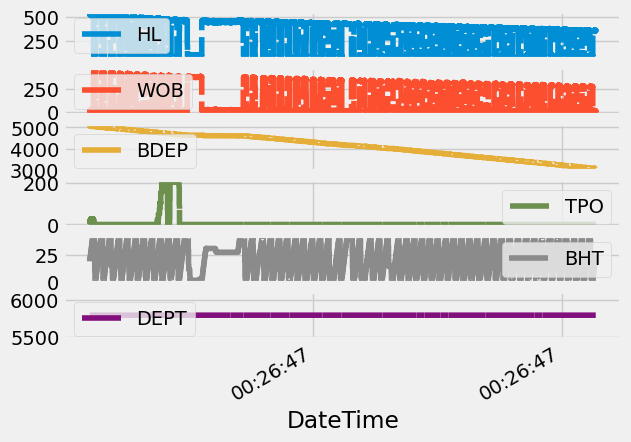

In [673]:
df.set_index('DateTime')[['HL','WOB','BDEP','TPO','BHT','DEPT']].plot(subplots=True)

In [674]:
df.count()

Timestamp     40782
BDEP          40673
TPO           40660
HL            40671
BHT           40658
DEPT          40651
WOB           40651
Annotation      109
DateTime      40782
dtype: int64

In [675]:
#separate datetime column into date and time 

df['Dates'] = pd.to_datetime(df['DateTime']).dt.date
df['Time'] = pd.to_datetime(df['DateTime']).dt.time

df["Hour"] = pd.to_datetime(df['DateTime']).dt.hour
df["Minute"] = pd.to_datetime(df['DateTime']).dt.minute
df["Second"] =pd.to_datetime(df['DateTime']).dt.second
df["Microsecond"] =pd.to_datetime(df['DateTime']).dt.microsecond

In [676]:
df.head()

,Timestamp,BDEP,TPO,HL,BHT,DEPT,WOB,Annotation,DateTime,Dates,Time,Hour,Minute,Second,Microsecond
0,1.607131e+12,5063.135,19.548731,522.503986,18.982,5795.817,13.38,NaN,1970-01-01 00:26:47.130720314,1970-01-01,00:26:47.130720,0,26,47,130720
1,1.607131e+12,5063.135,15.586150,523.159986,19.068,5795.817,12.73,NaN,1970-01-01 00:26:47.130720822,1970-01-01,00:26:47.130720,0,26,47,130720
2,1.607131e+12,5062.959,18.492043,524.441986,19.164,5795.817,11.45,NaN,1970-01-01 00:26:47.130721329,1970-01-01,00:26:47.130721,0,26,47,130721
3,1.607131e+12,5062.959,16.114494,525.053986,19.249,5795.817,10.84,NaN,1970-01-01 00:26:47.130721838,1970-01-01,00:26:47.130721,0,26,47,130721
4,1.607131e+12,5062.778,17.699526,526.081986,19.347,5795.817,9.81,NaN,1970-01-01 00:26:47.130722346,1970-01-01,00:26:47.130722,0,26,47,130722


In [677]:
df.tail()

,Timestamp,BDEP,TPO,HL,BHT,DEPT,WOB,Annotation,DateTime,Dates,Time,Hour,Minute,Second,Microsecond
104,1.607150e+12,NaN,NaN,NaN,NaN,NaN,NaN,off_slips,1970-01-01 00:26:47.150296,1970-01-01,00:26:47.150296,0,26,47,150296
105,1.607151e+12,NaN,NaN,NaN,NaN,NaN,NaN,on_slips,1970-01-01 00:26:47.150505,1970-01-01,00:26:47.150505,0,26,47,150505
106,1.607151e+12,NaN,NaN,NaN,NaN,NaN,NaN,off_slips,1970-01-01 00:26:47.150599,1970-01-01,00:26:47.150599,0,26,47,150599
107,1.607151e+12,NaN,NaN,NaN,NaN,NaN,NaN,on_slips,1970-01-01 00:26:47.150819,1970-01-01,00:26:47.150819,0,26,47,150819
108,1.607151e+12,NaN,NaN,NaN,NaN,NaN,NaN,off_slips,1970-01-01 00:26:47.150942,1970-01-01,00:26:47.150942,0,26,47,150942


In [678]:
# Since the datetime is constant throughtout the dataset, I will drop the columns as it doesnt help in analysis.
df.drop(['Dates','Time','Hour','Minute','Second','DateTime','Timestamp'],axis=1,inplace=True)

In [679]:
df

,BDEP,TPO,HL,BHT,DEPT,WOB,Annotation,Microsecond
0,5063.135,19.548731,522.503986,18.982,5795.817,13.38,NaN,130720
1,5063.135,15.586150,523.159986,19.068,5795.817,12.73,NaN,130720
2,5062.959,18.492043,524.441986,19.164,5795.817,11.45,NaN,130721
3,5062.959,16.114494,525.053986,19.249,5795.817,10.84,NaN,130721
4,5062.778,17.699526,526.081986,19.347,5795.817,9.81,NaN,130722
...,...,...,...,...,...,...,...,...
104,NaN,NaN,NaN,NaN,NaN,NaN,off_slips,150296
105,NaN,NaN,NaN,NaN,NaN,NaN,on_slips,150505
106,NaN,NaN,NaN,NaN,NaN,NaN,off_slips,150599
107,NaN,NaN,NaN,NaN,NaN,NaN,on_slips,150819


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015F3BB30BE0>,
      dtype=object)

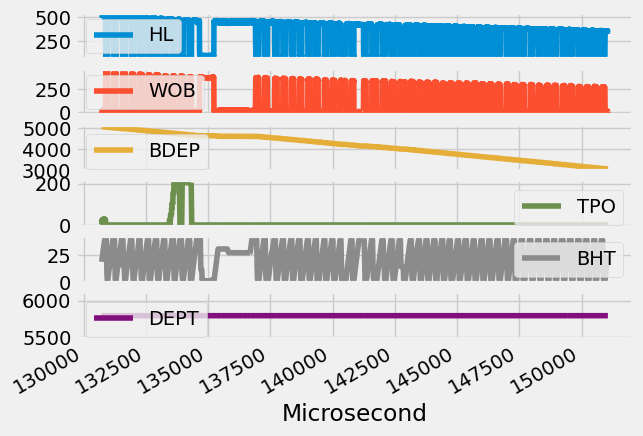

In [680]:
# Visualizing the features with respect to time
df.set_index('Microsecond')[['HL','WOB','BDEP','TPO','BHT','DEPT']].plot(subplots=True)

In [681]:
#Renaming Columns
#df.rename(columns = {'BDEP':'Bit depth','TPO':'Fluid flow','HL':'Hook Load','BHT':'Block Position','DEPT':'Hole depth','WOB='Weight on bit'}, inplace = True)

In [682]:
# Since Time is not correalted with the features, we will drop it
#df.drop(['Microsecond'],axis=1,inplace=True)

In [683]:
# convert the Annotation column 

#df['Annotation'].replace(['off_slips','on_slips'],[0,1],inplace=True)

In [684]:
df

,BDEP,TPO,HL,BHT,DEPT,WOB,Annotation,Microsecond
0,5063.135,19.548731,522.503986,18.982,5795.817,13.38,NaN,130720
1,5063.135,15.586150,523.159986,19.068,5795.817,12.73,NaN,130720
2,5062.959,18.492043,524.441986,19.164,5795.817,11.45,NaN,130721
3,5062.959,16.114494,525.053986,19.249,5795.817,10.84,NaN,130721
4,5062.778,17.699526,526.081986,19.347,5795.817,9.81,NaN,130722
...,...,...,...,...,...,...,...,...
104,NaN,NaN,NaN,NaN,NaN,NaN,off_slips,150296
105,NaN,NaN,NaN,NaN,NaN,NaN,on_slips,150505
106,NaN,NaN,NaN,NaN,NaN,NaN,off_slips,150599
107,NaN,NaN,NaN,NaN,NaN,NaN,on_slips,150819


### 2.a Missing Values

In [685]:
#check  for null values
df.isnull().sum()

BDEP             109
TPO              122
HL               111
BHT              124
DEPT             131
WOB              131
Annotation     40673
Microsecond        0
dtype: int64

In [686]:
#Find percentage of missing values in each column
percent_missing=(df.isnull().sum()/len(df))*100
print (round(percent_missing,2))

BDEP            0.27
TPO             0.30
HL              0.27
BHT             0.30
DEPT            0.32
WOB             0.32
Annotation     99.73
Microsecond     0.00
dtype: float64


In [687]:
# Since Annotation Column has 99.73 values missing, we drop the entire column
#df.drop(['Annotation'],axis=1,inplace=True)

In [688]:
a=df.pop('Annotation')

In [689]:
df

,BDEP,TPO,HL,BHT,DEPT,WOB,Microsecond
0,5063.135,19.548731,522.503986,18.982,5795.817,13.38,130720
1,5063.135,15.586150,523.159986,19.068,5795.817,12.73,130720
2,5062.959,18.492043,524.441986,19.164,5795.817,11.45,130721
3,5062.959,16.114494,525.053986,19.249,5795.817,10.84,130721
4,5062.778,17.699526,526.081986,19.347,5795.817,9.81,130722
...,...,...,...,...,...,...,...
104,NaN,NaN,NaN,NaN,NaN,NaN,150296
105,NaN,NaN,NaN,NaN,NaN,NaN,150505
106,NaN,NaN,NaN,NaN,NaN,NaN,150599
107,NaN,NaN,NaN,NaN,NaN,NaN,150819


In [690]:
# Since the remaining columns have only a few missing values, we replace these columns by  their mean .


In [691]:
df.fillna(df['BDEP'].mean(),inplace =True)

In [692]:
df.fillna(df['HL'].mean(),inplace =True)

In [693]:
df.fillna(df['TPO'].mean(),inplace =True)

In [694]:
df.fillna(df['BHT'].mean(),inplace =True)

In [695]:
df.fillna(df['DEPT'].mean(),inplace =True)

In [696]:
df.fillna(df['WOB'].mean(),inplace =True)

In [697]:
#  Now Again check  if all the columns are replace by their  mean values
df.isnull().sum()

BDEP           0
TPO            0
HL             0
BHT            0
DEPT           0
WOB            0
Microsecond    0
dtype: int64

### 2.b Duplicated Values

In [698]:
# Finding duplicates across all Columns
df.duplicated(subset=['BDEP','TPO','HL','BHT','DEPT','WOB','Microsecond'])
df

,BDEP,TPO,HL,BHT,DEPT,WOB,Microsecond
0,5063.135000,19.548731,522.503986,18.982000,5795.817000,13.380000,130720
1,5063.135000,15.586150,523.159986,19.068000,5795.817000,12.730000,130720
2,5062.959000,18.492043,524.441986,19.164000,5795.817000,11.450000,130721
3,5062.959000,16.114494,525.053986,19.249000,5795.817000,10.840000,130721
4,5062.778000,17.699526,526.081986,19.347000,5795.817000,9.810000,130722
...,...,...,...,...,...,...,...
104,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,150296
105,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,150505
106,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,150599
107,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,150819


In [699]:
# Count Duplicates in a dataframe
df.duplicated().sum()

14

In [700]:
#Extract duplicate rows using loc data selector.The first argument df.duplicated() will find the rows that were identified by duplicated(.The 2nd argument : will display all columns)
df.loc[df.duplicated(),:]

,BDEP,TPO,HL,BHT,DEPT,WOB,Microsecond
551,5036.768,0.000000,512.627987,8.297000,5795.817000,23.260000,130995
4858,4794.347,0.000000,488.915987,28.550000,5795.817000,-10.090000,133150
7975,4635.444,0.000000,97.159997,11.627000,5795.817000,372.280000,134709
10965,4610.241,0.000000,457.757988,27.160000,5795.817000,3.740000,136204
11915,4610.241,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,136679
12241,4597.648,0.000000,445.587988,39.753000,5795.817000,15.910000,136842
14663,4486.915,0.000000,96.383998,3.044000,5795.817000,355.590000,138053
16713,4376.057,0.000000,95.859998,2.000000,5795.817000,349.810000,139078
17021,4350.995,0.000000,438.369989,27.298000,5795.817000,7.300000,139232
17427,4338.837,0.000000,427.277989,2.438000,5795.817000,18.390000,139435


In [701]:
# keep=first , means the first occurence gets kept and all others get identified as duplicates
df.loc[df.duplicated(keep='first'),:]

,BDEP,TPO,HL,BHT,DEPT,WOB,Microsecond
551,5036.768,0.000000,512.627987,8.297000,5795.817000,23.260000,130995
4858,4794.347,0.000000,488.915987,28.550000,5795.817000,-10.090000,133150
7975,4635.444,0.000000,97.159997,11.627000,5795.817000,372.280000,134709
10965,4610.241,0.000000,457.757988,27.160000,5795.817000,3.740000,136204
11915,4610.241,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,136679
12241,4597.648,0.000000,445.587988,39.753000,5795.817000,15.910000,136842
14663,4486.915,0.000000,96.383998,3.044000,5795.817000,355.590000,138053
16713,4376.057,0.000000,95.859998,2.000000,5795.817000,349.810000,139078
17021,4350.995,0.000000,438.369989,27.298000,5795.817000,7.300000,139232
17427,4338.837,0.000000,427.277989,2.438000,5795.817000,18.390000,139435


In [702]:
#Dropping Duplicate rows from the original dataframe
df.drop_duplicates(inplace=True)
df

,BDEP,TPO,HL,BHT,DEPT,WOB,Microsecond
0,5063.135000,19.548731,522.503986,18.982000,5795.817000,13.380000,130720
1,5063.135000,15.586150,523.159986,19.068000,5795.817000,12.730000,130720
2,5062.959000,18.492043,524.441986,19.164000,5795.817000,11.450000,130721
3,5062.959000,16.114494,525.053986,19.249000,5795.817000,10.840000,130721
4,5062.778000,17.699526,526.081986,19.347000,5795.817000,9.810000,130722
...,...,...,...,...,...,...,...
104,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,150296
105,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,150505
106,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,150599
107,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,150819


In [703]:
# columns for dropping duplicates
df.drop_duplicates(subset=['BDEP','TPO','HL','BHT','DEPT','WOB','Microsecond'])

,BDEP,TPO,HL,BHT,DEPT,WOB,Microsecond
0,5063.135000,19.548731,522.503986,18.982000,5795.817000,13.380000,130720
1,5063.135000,15.586150,523.159986,19.068000,5795.817000,12.730000,130720
2,5062.959000,18.492043,524.441986,19.164000,5795.817000,11.450000,130721
3,5062.959000,16.114494,525.053986,19.249000,5795.817000,10.840000,130721
4,5062.778000,17.699526,526.081986,19.347000,5795.817000,9.810000,130722
...,...,...,...,...,...,...,...
104,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,150296
105,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,150505
106,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,150599
107,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,150819


In [704]:
df

,BDEP,TPO,HL,BHT,DEPT,WOB,Microsecond
0,5063.135000,19.548731,522.503986,18.982000,5795.817000,13.380000,130720
1,5063.135000,15.586150,523.159986,19.068000,5795.817000,12.730000,130720
2,5062.959000,18.492043,524.441986,19.164000,5795.817000,11.450000,130721
3,5062.959000,16.114494,525.053986,19.249000,5795.817000,10.840000,130721
4,5062.778000,17.699526,526.081986,19.347000,5795.817000,9.810000,130722
...,...,...,...,...,...,...,...
104,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,150296
105,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,150505
106,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,150599
107,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,4128.110895,150819


#### 2c. Finding Outliers

#### Use box plot to find outliers or noise

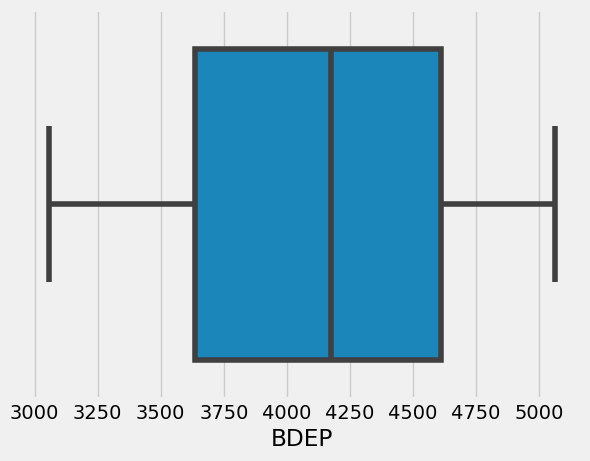

In [705]:
sns.boxplot(df['BDEP'])

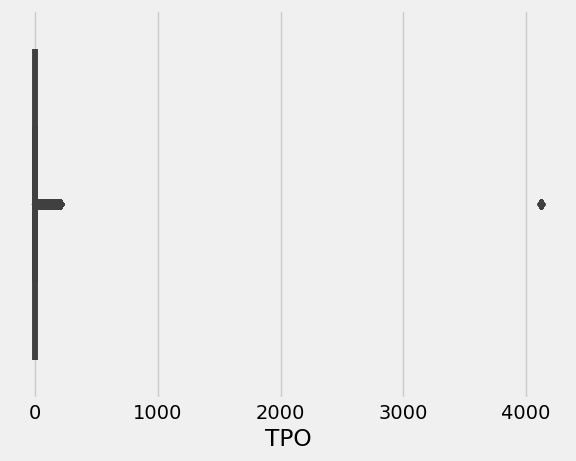

In [706]:
sns.boxplot(df['TPO'])

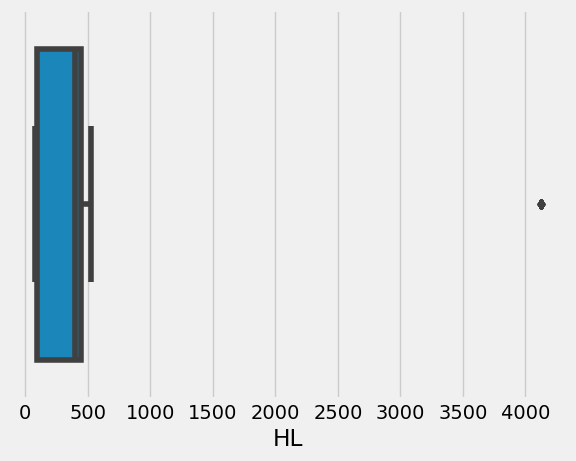

In [707]:
sns.boxplot(df['HL'])

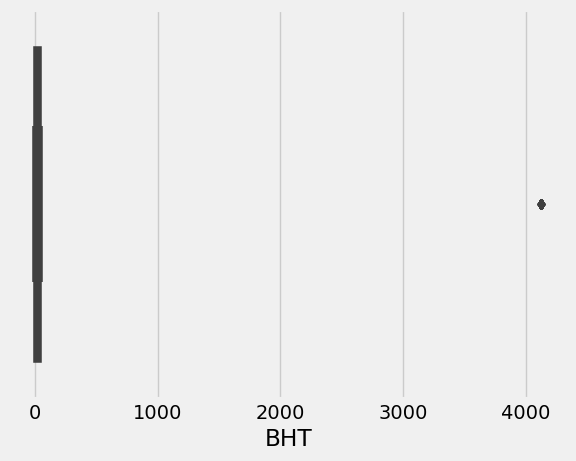

In [708]:
sns.boxplot(df['BHT'])

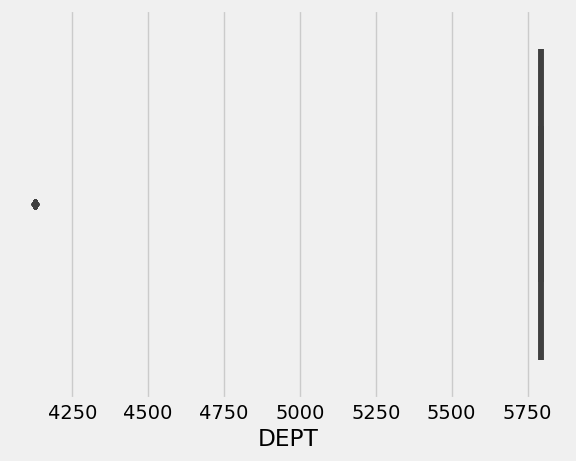

In [709]:
sns.boxplot(df['DEPT'])

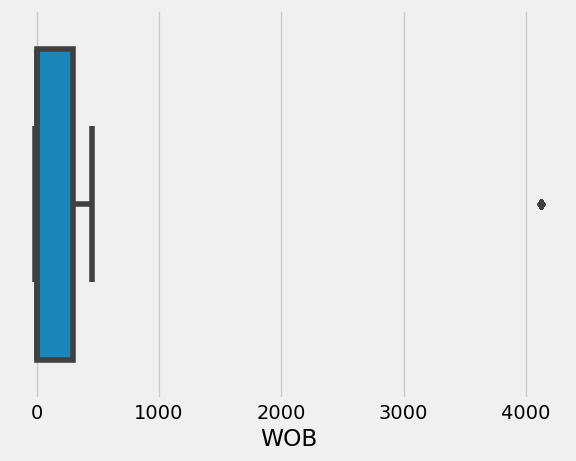

In [710]:
sns.boxplot(df['WOB'])


In [711]:
# Removing  outliers from multiple columns
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

final_df=cap_data(df)

capping the  BDEP
capping the  TPO
capping the  HL
capping the  BHT
capping the  DEPT
capping the  WOB
capping the  Microsecond


#### 1.a Identify Relationships between Variables

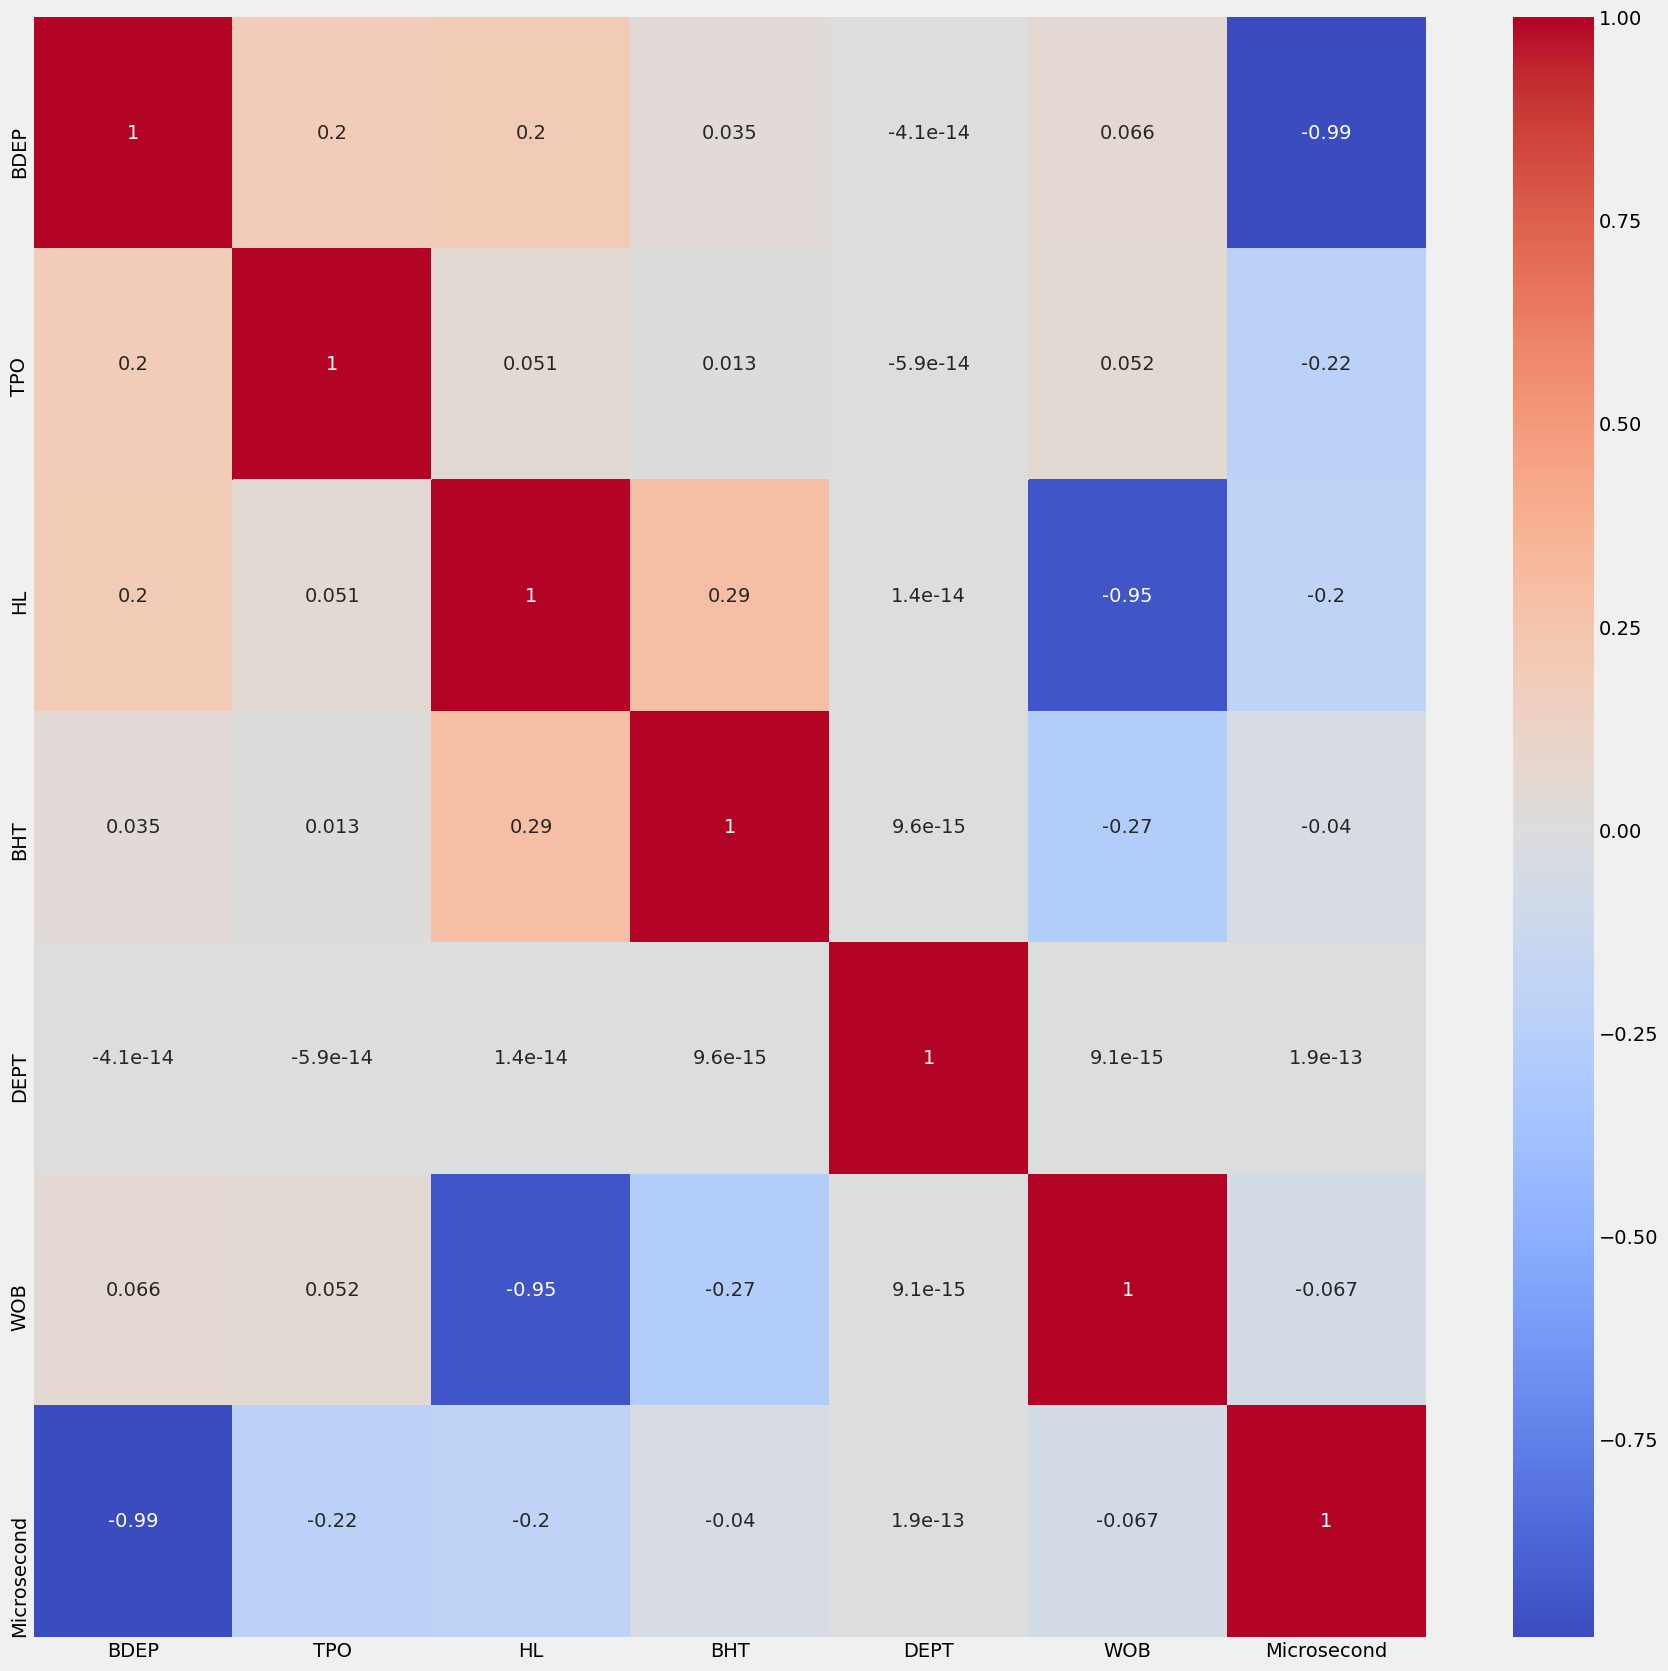

In [712]:
# Checking for correlations with heat Map
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm');

#### The Heat Map show strong negative correlation between:
       1.Hook load (HL) and Weight on bit(WOB)
      
       2.Time(microseconds) and BDEP

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015F3CDA78B0>,
      dtype=object)

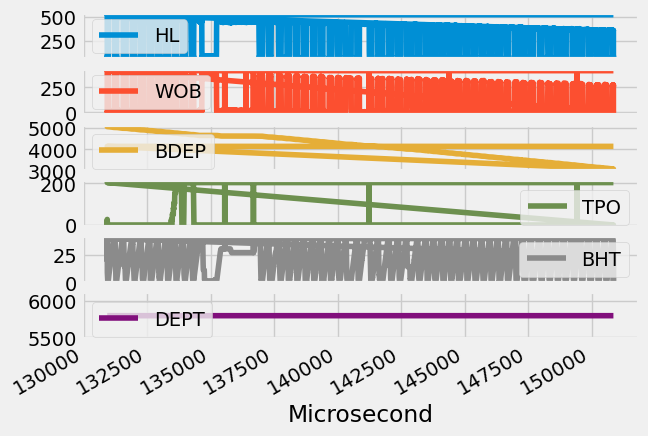

In [713]:
df.set_index('Microsecond')[['HL','WOB','BDEP','TPO','BHT','DEPT']].plot(subplots=True)

In [ ]:
# Since Time is not correalted with the features, we will drop it
#df.drop(['Microsecond'],axis=1,inplace=True)

In [ ]:
# convert the Annotation column 

#df['Annotation'].replace(['off_slips','on_slips'],[0,1],inplace=True)

#### Feature Scaling: Since I dropped the target column, I  will use KMeans clustering unsupervised algorithm.since KMeans is a distance algorithm, the difference of magnitude of the features can create problems, hence I will use scaling to bring all the feature variables to the same magnitude.

In [715]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scaled= sc.fit_transform(df)

In [716]:
df_scaled

array([[ 1.61875057e+00,  3.23968142e-01,  1.24385521e+00, ...,
         1.00000000e+00, -6.22322152e-01, -1.69883104e+00],
       [ 1.61875057e+00,  2.16911747e-01,  1.24385521e+00, ...,
         1.00000000e+00, -6.26501711e-01, -1.69883104e+00],
       [ 1.61875057e+00,  2.95419770e-01,  1.24385521e+00, ...,
         1.00000000e+00, -6.34732226e-01, -1.69883104e+00],
       ...,
       [ 8.69459149e-05,  5.30565907e+00,  1.24385521e+00, ...,
         1.00000000e+00,  1.98209969e+00,  1.65407671e+00],
       [ 8.69459149e-05,  5.30565907e+00,  1.24385521e+00, ...,
         1.00000000e+00,  1.98209969e+00,  1.69156540e+00],
       [ 8.69459149e-05,  5.30565907e+00,  1.24385521e+00, ...,
         1.00000000e+00,  1.98209969e+00,  1.69787031e+00]])

In [717]:
pd.DataFrame(df_scaled).describe()

,0,1,2,3,4,5,6
count,4.076800e+04,4.076800e+04,4.076800e+04,4.076800e+04,40768.0,4.076800e+04,4.076800e+04
mean,-3.570743e-14,-4.627434e-14,-4.027935e-16,1.602590e-16,1.0,3.645915e-17,-1.033427e-16
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,0.0,1.000012e+00,1.000012e+00
min,-1.858179e+00,-2.041767e-01,-1.503955e+00,-1.436171e+00,1.0,-7.522100e-01,-1.698831e+00
25%,-8.687040e-01,-2.041767e-01,-1.432284e+00,-9.985137e-01,1.0,-6.969755e-01,-8.665686e-01
50%,8.215148e-02,-2.041767e-01,4.533990e-01,9.320221e-02,1.0,-6.656610e-01,3.997695e-04
75%,8.533659e-01,-2.041767e-01,7.781022e-01,9.108309e-01,1.0,1.184115e+00,8.664736e-01
max,1.618751e+00,5.305659e+00,1.243855e+00,1.397283e+00,1.0,1.982100e+00,1.697870e+00


#### The magnitude looks similar now.Lets create a KMeans function and fit it on the data:

#### KMeans Clustering Algorithm- I have used K-means++ initialization which generally produces better results then random initialization

In [718]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,init='k-means++')
kmeans.fit(df_scaled)

KMeans(n_clusters=5)

In [719]:
#To evaluate how well the formed clusters are , we calculate the inertia of the clusters
kmeans.inertia_

64677.51529159951

### Using the elbow method to find the optimal number of clusters

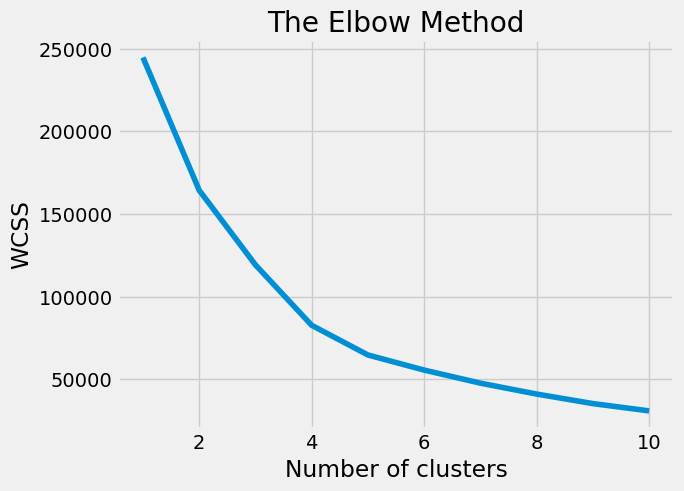

In [720]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [721]:
#From the Elbow curve, we get 2 as the optimal number of clusters, so lets set K=2 and fit the model.

from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2,init='k-means++')
kmeans.fit(df_scaled)

KMeans(n_clusters=2)

#Now , lets look at the value count of points in each of the above formed clusters:
    
    

In [722]:
labels=kmeans.labels_

In [723]:
labels

array([1, 1, 1, ..., 1, 1, 1])

In [724]:
kmeans.inertia_

164271.13593723296

In [725]:
kmeans.cluster_centers_

array([[-0.0354049 , -0.00941153, -1.42682112, -0.42010549,  1.        ,
         1.43146535,  0.03312604],
       [ 0.0163628 ,  0.00434965,  0.65942246,  0.19415678,  1.        ,
        -0.66156884, -0.0153096 ]])

In [726]:
#get each cluster size
from collections import Counter
Counter(kmeans.labels_)


Counter({1: 27885, 0: 12883})

In [727]:
y_pred=kmeans.predict(df_scaled)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

##### Kmeans clustering has 2 clusters 0: 27574, 1: 12696

In [728]:
# Adding the kmeans output to the original DataFrame
df['Slips']=labels

In [729]:
df.head()

,BDEP,TPO,HL,BHT,DEPT,WOB,Microsecond,Slips
0,5042.708,19.548731,518.910347,18.982,5795.817,13.38,130922.67,1
1,5042.708,15.586150,518.910347,19.068,5795.817,12.73,130922.67,1
2,5042.708,18.492043,518.910347,19.164,5795.817,11.45,130922.67,1
3,5042.708,16.114494,518.910347,19.249,5795.817,10.84,130922.67,1
4,5042.708,17.699526,518.910347,19.347,5795.817,9.81,130922.67,1


In [730]:
df['Slips']

0      1
1      1
2      1
3      1
4      1
      ..
104    1
105    1
106    1
107    1
108    1
Name: Slips, Length: 40768, dtype: int32

In [731]:
df=df.join(a)


In [732]:
df

,BDEP,TPO,HL,BHT,DEPT,WOB,Microsecond,Slips,Annotation
0,5042.708000,19.548731,518.910347,18.982,5795.817,13.3800,130922.67,1,NaN
0,5042.708000,19.548731,518.910347,18.982,5795.817,13.3800,130922.67,1,off_slips
0,4128.110895,203.940813,518.910347,39.753,5795.817,418.4166,130922.67,1,NaN
0,4128.110895,203.940813,518.910347,39.753,5795.817,418.4166,130922.67,1,off_slips
1,5042.708000,15.586150,518.910347,19.068,5795.817,12.7300,130922.67,1,NaN
...,...,...,...,...,...,...,...,...,...
40668,3078.131000,0.000000,358.541991,24.768,5795.817,2.4600,150856.00,1,NaN
40669,3078.131000,0.000000,358.595991,24.856,5795.817,2.4000,150856.00,1,NaN
40670,3078.131000,0.000000,358.605991,24.940,5795.817,2.3900,150856.00,1,NaN
40671,3078.131000,0.000000,358.411991,25.038,5795.817,2.5900,150856.00,1,NaN


In [733]:
comparison_column = np.where(df["Slips"] == df["Annotation"], True, False)

In [734]:
print(comparison_column)

[False False False ... False False False]


In [735]:
df["equal"] = comparison_column


In [736]:
df

,BDEP,TPO,HL,BHT,DEPT,WOB,Microsecond,Slips,Annotation,equal
0,5042.708000,19.548731,518.910347,18.982,5795.817,13.3800,130922.67,1,NaN,False
0,5042.708000,19.548731,518.910347,18.982,5795.817,13.3800,130922.67,1,off_slips,False
0,4128.110895,203.940813,518.910347,39.753,5795.817,418.4166,130922.67,1,NaN,False
0,4128.110895,203.940813,518.910347,39.753,5795.817,418.4166,130922.67,1,off_slips,False
1,5042.708000,15.586150,518.910347,19.068,5795.817,12.7300,130922.67,1,NaN,False
...,...,...,...,...,...,...,...,...,...,...
40668,3078.131000,0.000000,358.541991,24.768,5795.817,2.4600,150856.00,1,NaN,False
40669,3078.131000,0.000000,358.595991,24.856,5795.817,2.4000,150856.00,1,NaN,False
40670,3078.131000,0.000000,358.605991,24.940,5795.817,2.3900,150856.00,1,NaN,False
40671,3078.131000,0.000000,358.411991,25.038,5795.817,2.5900,150856.00,1,NaN,False


### Visualization of K-means Clustering

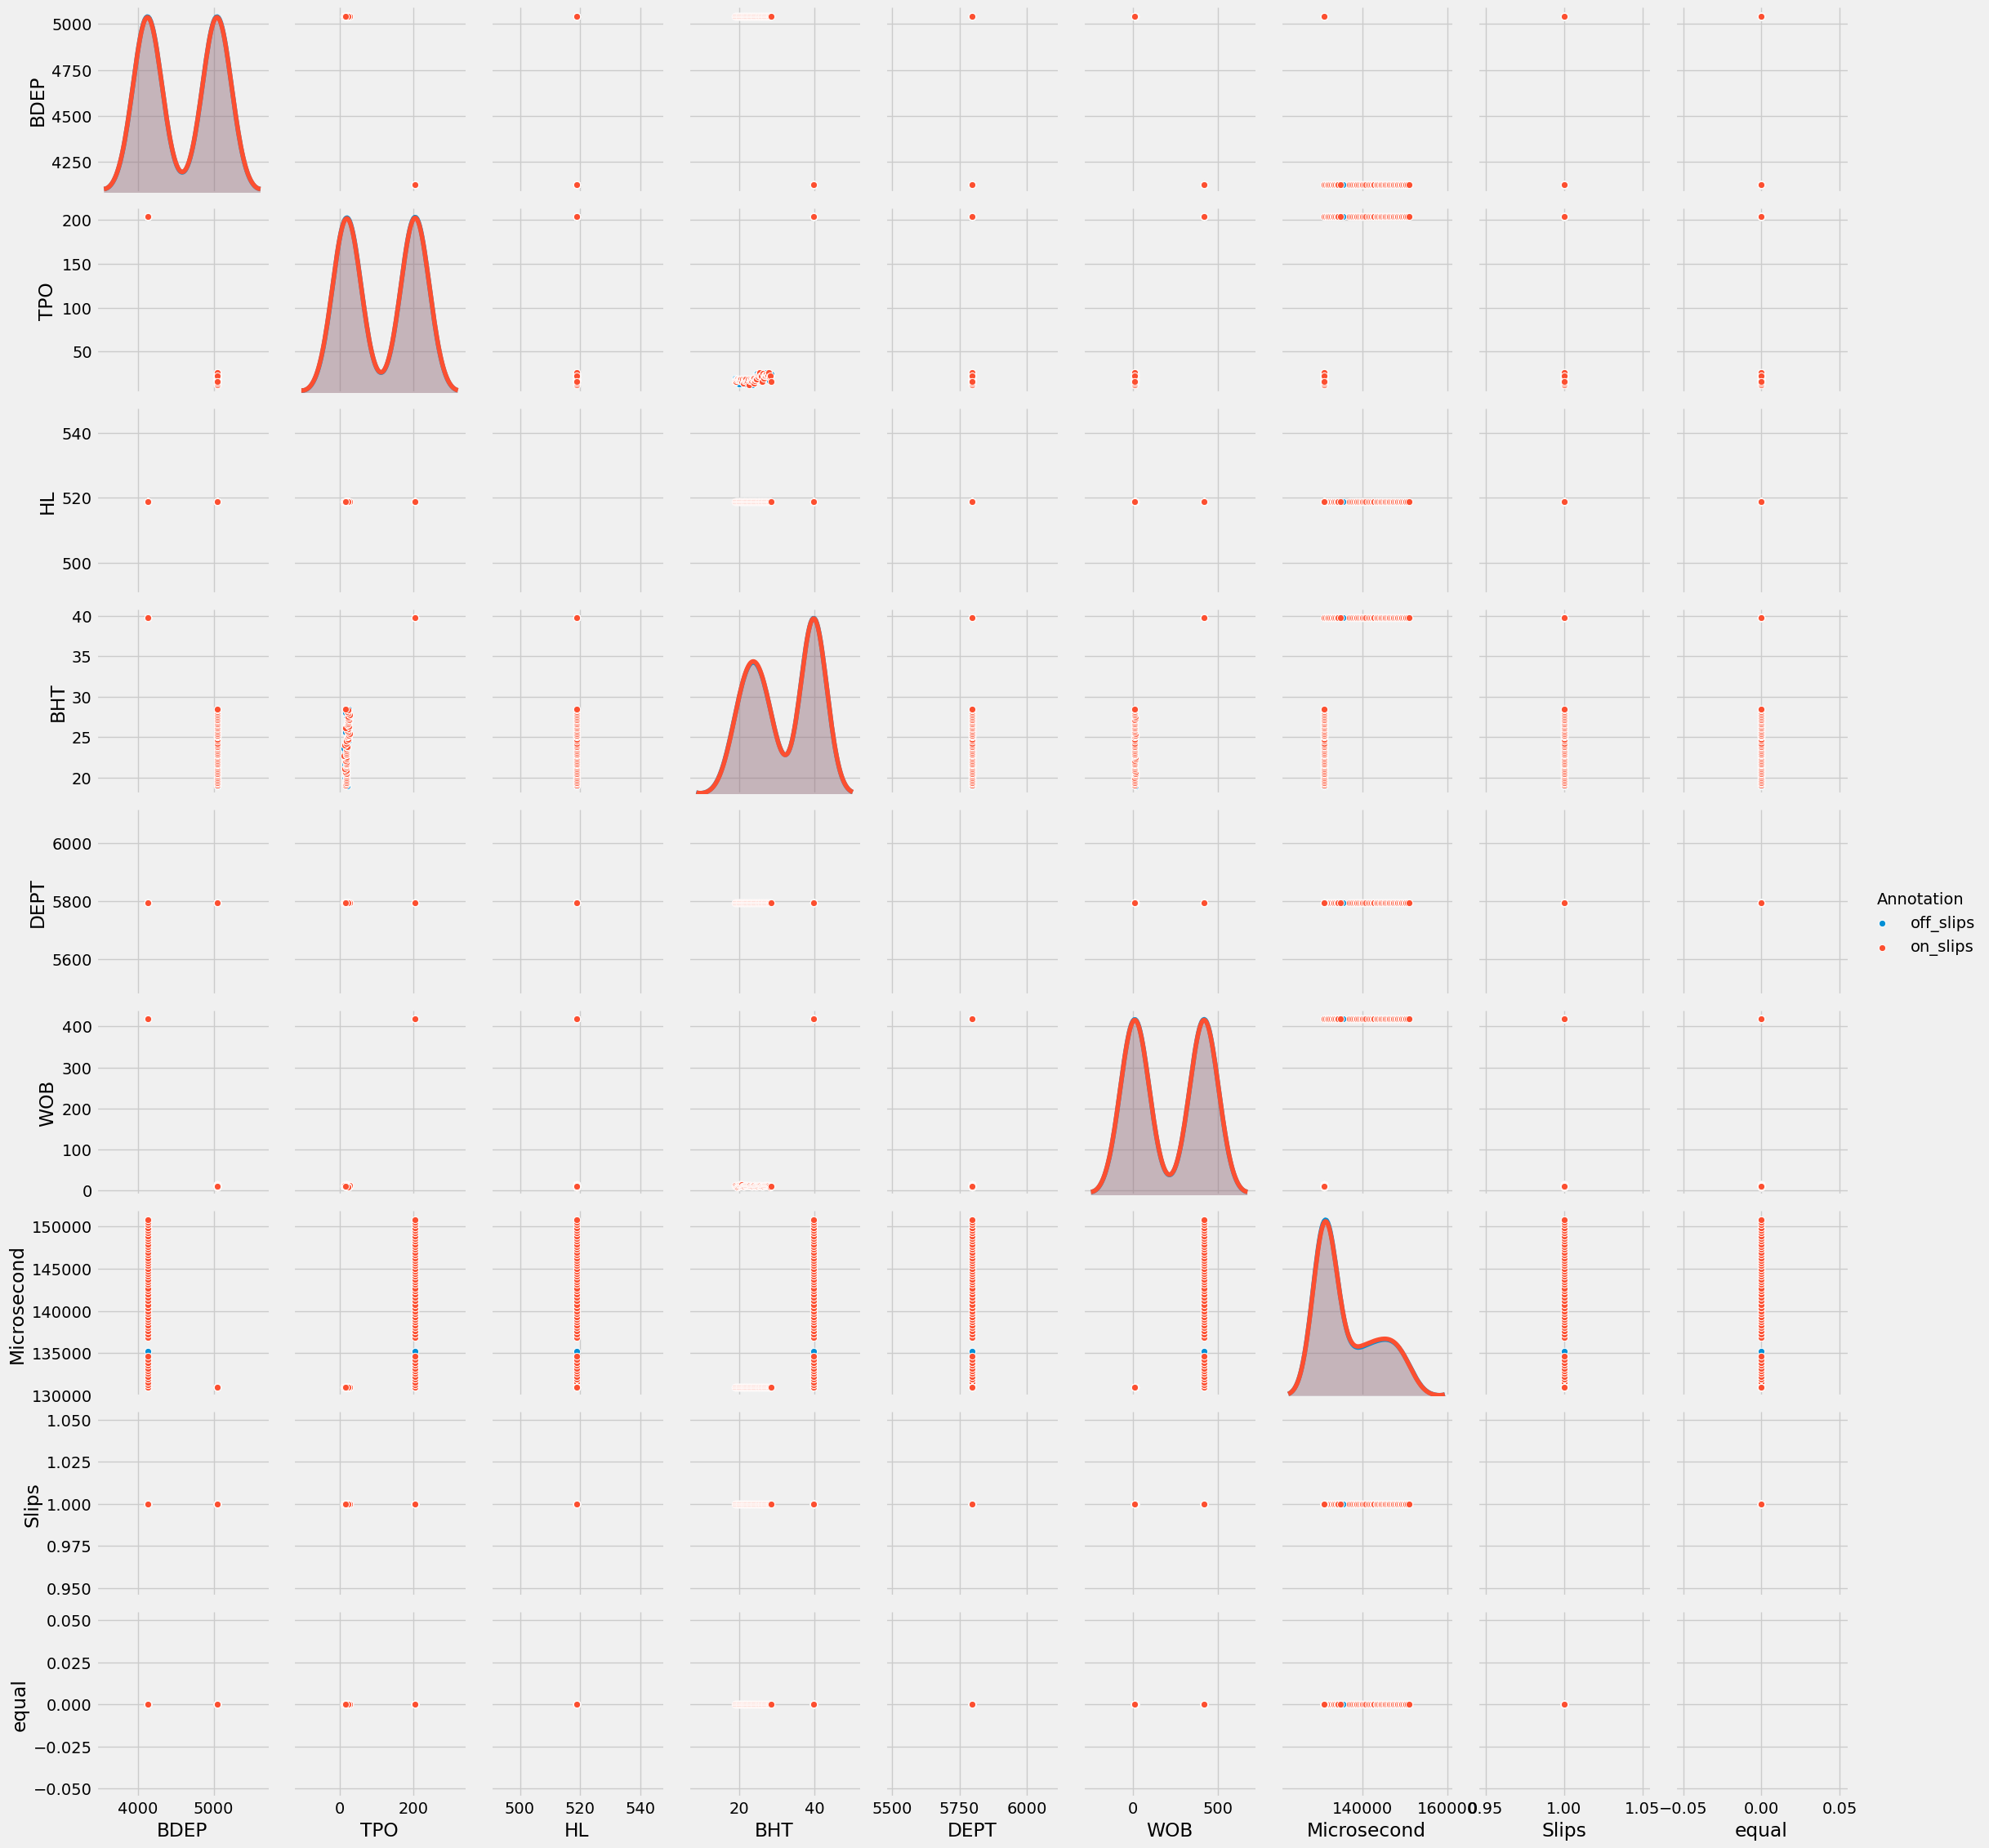

In [737]:
sns.pairplot(df,hue='Annotation')

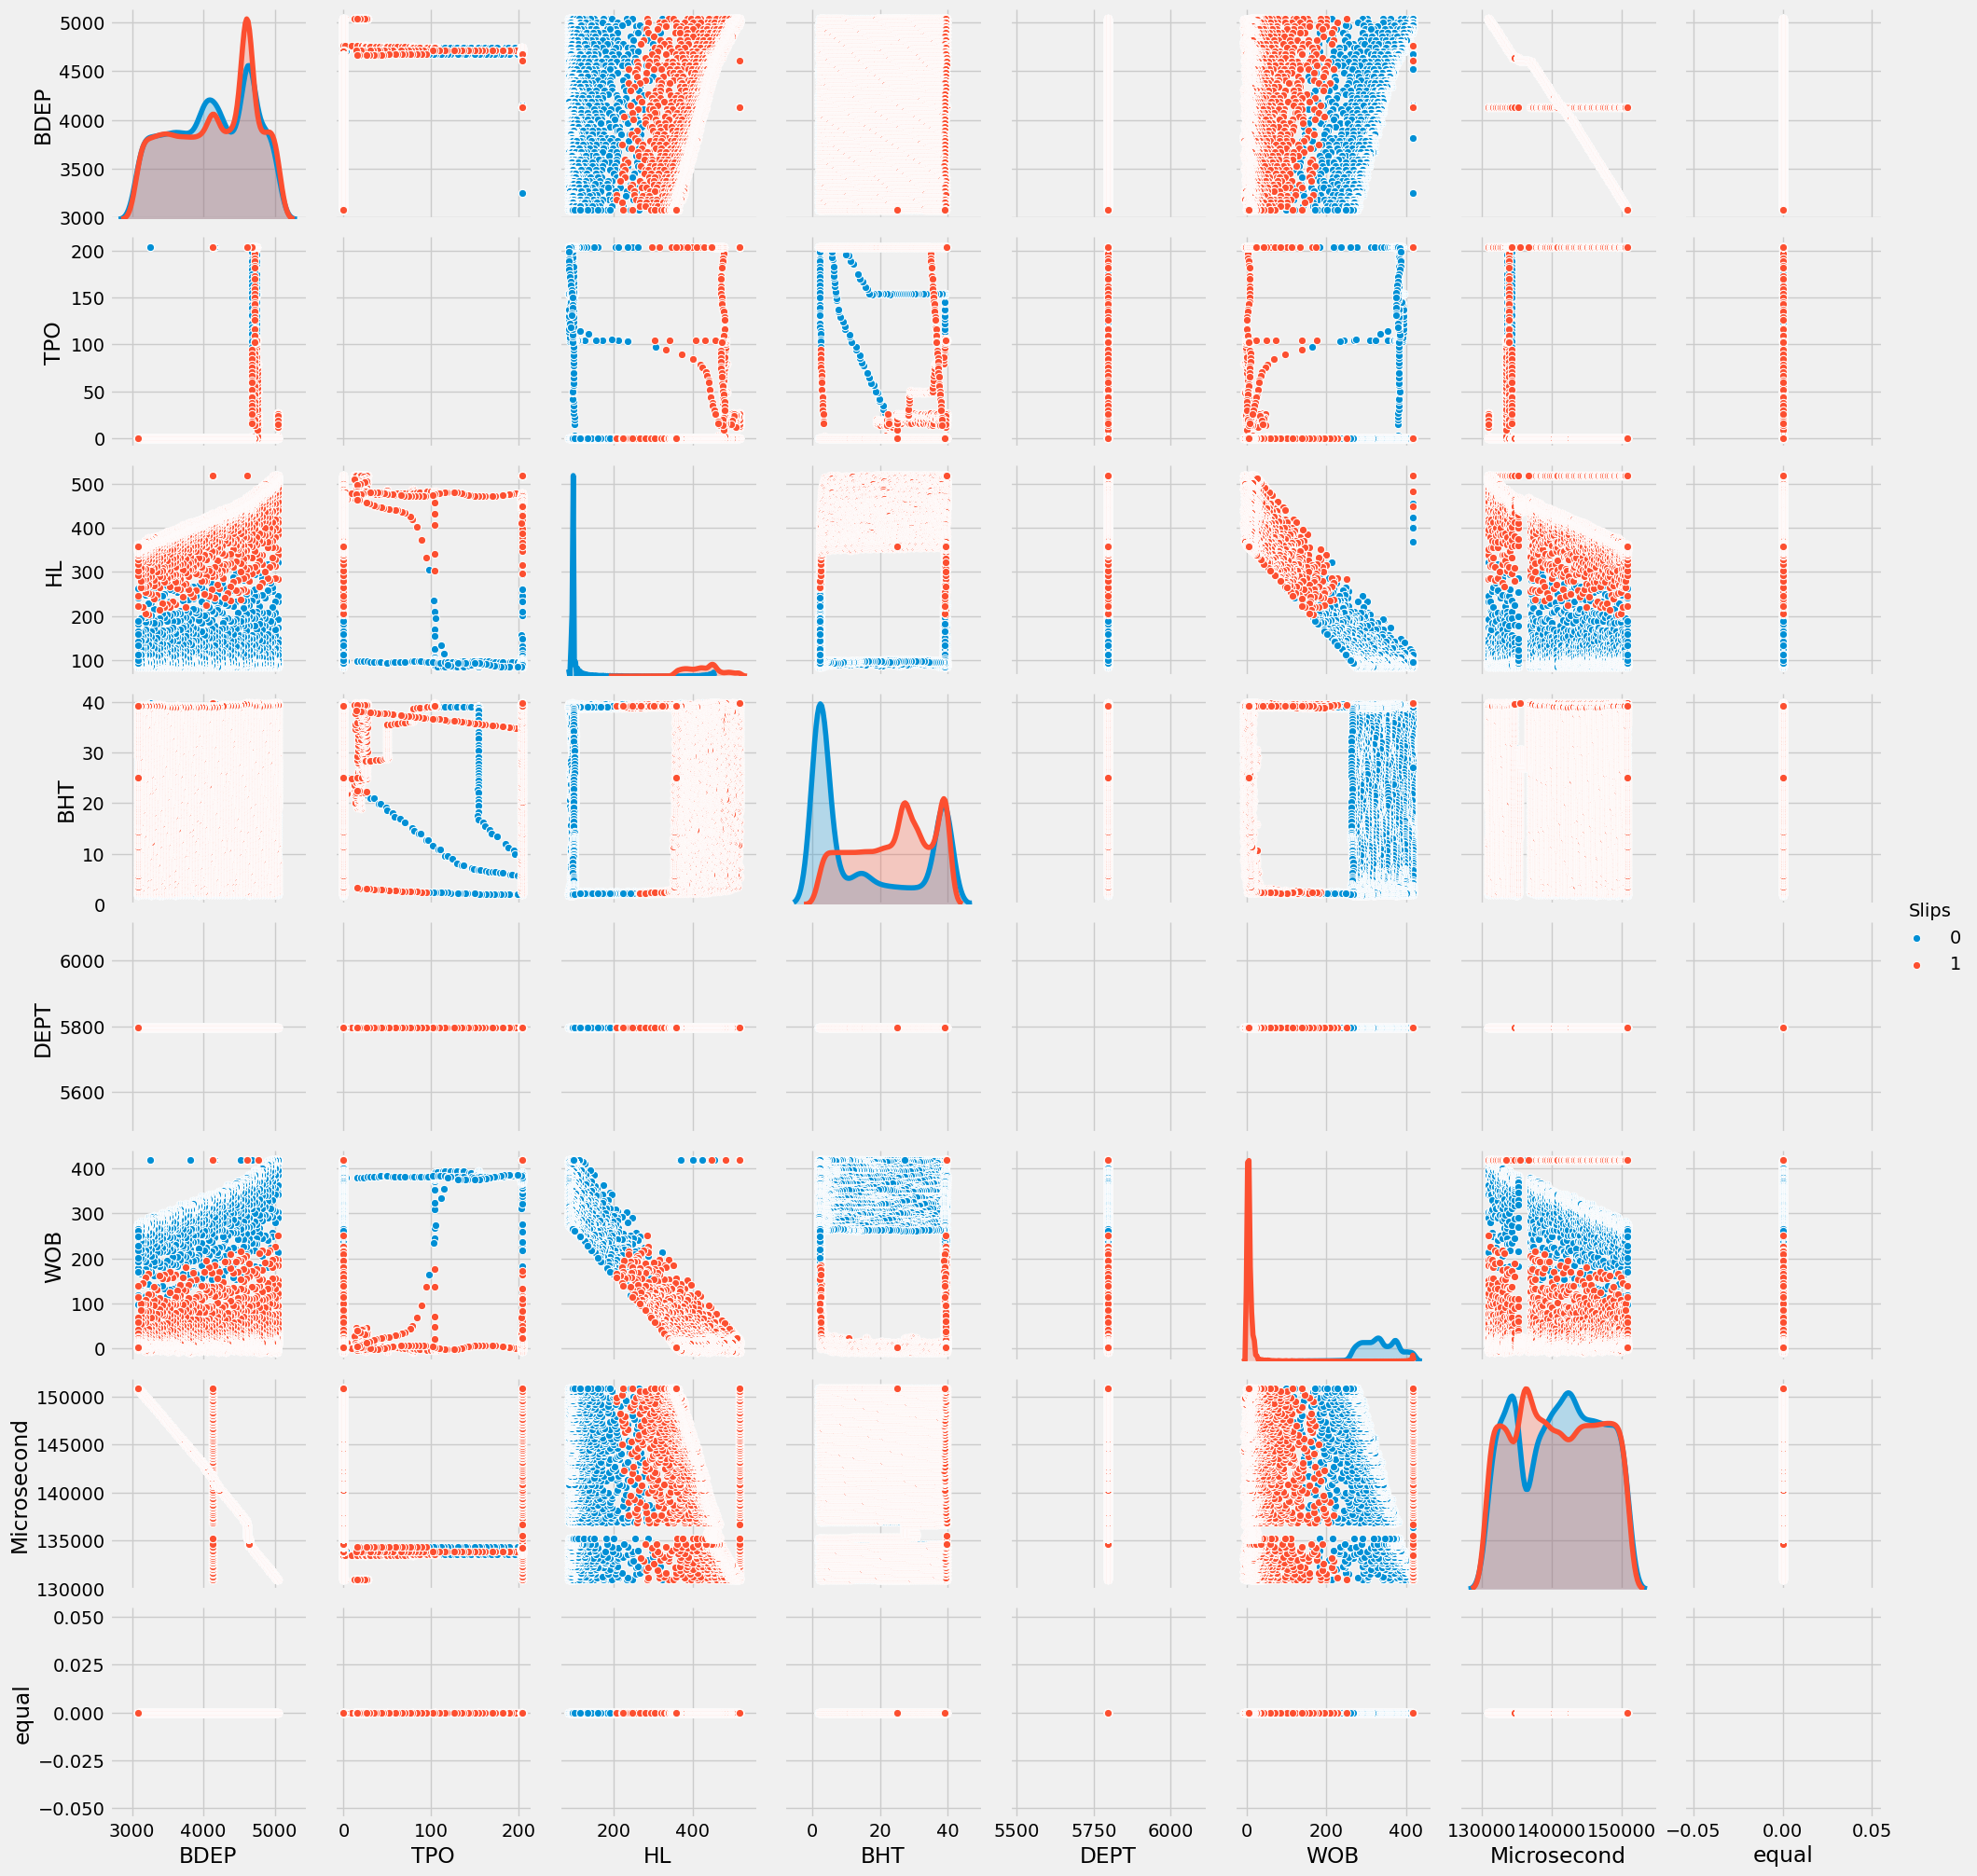

In [738]:
sns.pairplot(df,hue='Slips')

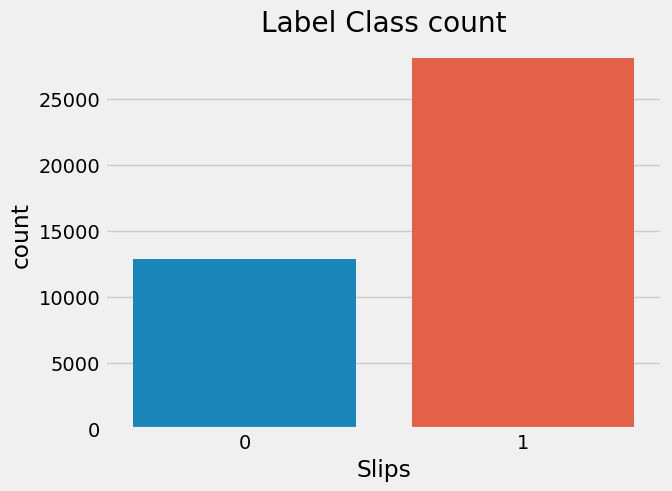

In [739]:
# Count of Label class
plt.title('Label Class count')
sns.countplot(x='Slips',data=df)

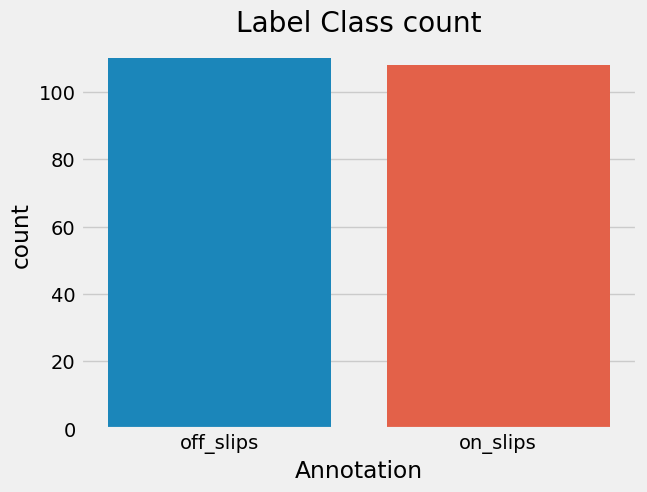

In [740]:
# Count of Label class
plt.title('Label Class count')
sns.countplot(x='Annotation',data=df)


In [741]:

columns=df.drop(['Annotation','equal'],axis=1)


In [742]:
df=columns
df

,BDEP,TPO,HL,BHT,DEPT,WOB,Microsecond,Slips
0,5042.708000,19.548731,518.910347,18.982,5795.817,13.3800,130922.67,1
0,5042.708000,19.548731,518.910347,18.982,5795.817,13.3800,130922.67,1
0,4128.110895,203.940813,518.910347,39.753,5795.817,418.4166,130922.67,1
0,4128.110895,203.940813,518.910347,39.753,5795.817,418.4166,130922.67,1
1,5042.708000,15.586150,518.910347,19.068,5795.817,12.7300,130922.67,1
...,...,...,...,...,...,...,...,...
40668,3078.131000,0.000000,358.541991,24.768,5795.817,2.4600,150856.00,1
40669,3078.131000,0.000000,358.595991,24.856,5795.817,2.4000,150856.00,1
40670,3078.131000,0.000000,358.605991,24.940,5795.817,2.3900,150856.00,1
40671,3078.131000,0.000000,358.411991,25.038,5795.817,2.5900,150856.00,1


#### Since it is a unbalanced dataset, I will use precison,recall ,f1_score and auc-roc as measure to evaluate the performance of the models.In an unbalanced dataset ,accuracy is considered a poor choice as it gives high scores to models which just predict the most frequent class.

In [743]:
#### Split the dataset in 70% train and 30% test sets.

In [744]:
from sklearn.model_selection import train_test_split

In [745]:
X = df.drop('Slips',axis=1)
y = df['Slips']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

#### Now I will use different machine learning classifiers and see which model performs best.

In [746]:
#Import scikit-learn metrics module for model evaluation

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

#### Decision Tree

In [747]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=4,max_leaf_nodes=10)
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [748]:
from sklearn.metrics import classification_report,confusion_matrix

In [749]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3796
           1       1.00      1.00      1.00      8500

    accuracy                           1.00     12296
   macro avg       1.00      1.00      1.00     12296
weighted avg       1.00      1.00      1.00     12296



In [750]:
print(confusion_matrix(y_test,predictions))

[[3786   10]
 [   7 8493]]


In [751]:
#Model Evaluation

print("Accuracy:",metrics.accuracy_score(y_test,predictions))
print("Precision:",metrics.precision_score(y_test,predictions))
print("Recall:",metrics.recall_score(y_test,predictions))
print("F1_score:",metrics.f1_score(y_test,predictions))
print("Auc:",metrics.roc_auc_score(y_test,predictions))

Accuracy: 0.9986174365647364
Precision: 0.99882394449018
Recall: 0.9991764705882353
F1_score: 0.9990001764394518
Auc: 0.9982710593194075


#### Random Forest¶

In [752]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='gini',random_state=23,max_depth=6,bootstrap=True)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, random_state=23)

In [753]:
predictions = rfc.predict(X_test)

In [754]:
#thit is how we get the feature importance with simple steps:
rfc.fit(X_train,y_train)
# display the relative importance of each attribute
importances = rfc.feature_importances_

#Sort it
print ("Sorted Feature Importance:")
sorted_feature_importance =pd.DataFrame( sorted(zip(importances, list(X_train)), reverse=True))

print (sorted_feature_importance)


Sorted Feature Importance:
          0            1
0  0.455076           HL
1  0.451372          WOB
2  0.077229          BHT
3  0.007867         BDEP
4  0.006452  Microsecond
5  0.002005          TPO
6  0.000000         DEPT


Text(0.5, 1.0, 'Feature Importance')

<Figure size 2000x2000 with 0 Axes>

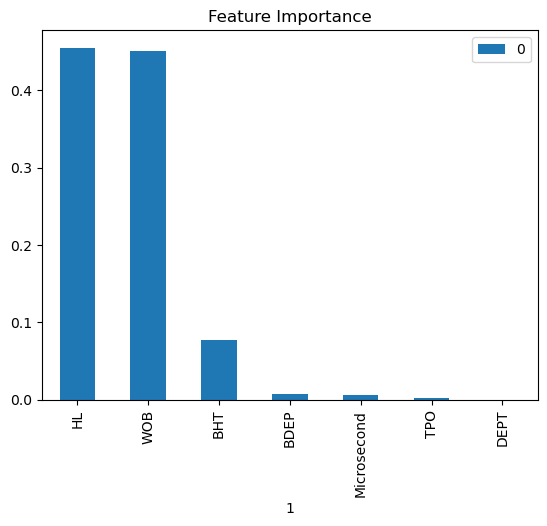

In [755]:
plt.rcdefaults()
plt.figure(figsize=(20,20))
sorted_feature_importance.head(40).plot(kind='bar',x=1)
plt.title('Feature Importance')

#### From the above plot , we can say that Hook Load(HL) , Weight on bit (WOB) and BHT(Block position) are the most important features in detection of when the slips are on or off.

In [756]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3796
           1       1.00      1.00      1.00      8500

    accuracy                           1.00     12296
   macro avg       1.00      1.00      1.00     12296
weighted avg       1.00      1.00      1.00     12296



In [757]:
print(confusion_matrix(y_test,predictions))

[[3794    2]
 [   1 8499]]


In [758]:
# model evaluation
print("Accuracy:",metrics.accuracy_score(y_test,predictions))
print("Precision:",metrics.precision_score(y_test,predictions))
print("Recall:",metrics.recall_score(y_test,predictions))
print("F1_score:",metrics.f1_score(y_test,predictions))
print("Auc:",metrics.roc_auc_score(y_test,predictions))

Accuracy: 0.9997560182173064
Precision: 0.9997647335607576
Recall: 0.9998823529411764
F1_score: 0.9998235397917768
Auc: 0.9996777412756462


#### SVM

In [759]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [760]:
predictions = model.predict(X_test)

In [761]:
from sklearn.metrics import classification_report,confusion_matrix

In [762]:
print(confusion_matrix(y_test,predictions))

[[3792    4]
 [   3 8497]]


In [763]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3796
           1       1.00      1.00      1.00      8500

    accuracy                           1.00     12296
   macro avg       1.00      1.00      1.00     12296
weighted avg       1.00      1.00      1.00     12296



In [764]:
#model evaluation

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

print("Accuracy:",metrics.accuracy_score(y_test,predictions))
print("Precision:",metrics.precision_score(y_test,predictions))
print("Recall:",metrics.recall_score(y_test,predictions))
print("F1_score:",metrics.f1_score(y_test,predictions))
print("Auc:",metrics.roc_auc_score(y_test,predictions))

Accuracy: 0.999430709173715
Precision: 0.9995294671215151
Recall: 0.9996470588235294
F1_score: 0.9995882595141462
Auc: 0.9992966590218807


#### Artificial Neural Networks

In [765]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
897/897 [==============================] - 31s 3ms/step - loss: 10793.0791 - accuracy: 0.3297
Epoch 2/100
897/897 [==============================] - 2s 2ms/step - loss: 0.6262 - accuracy: 0.6817
Epoch 3/100
897/897 [==============================] - 3s 3ms/step - loss: 0.6259 - accuracy: 0.6816
Epoch 4/100
897/897 [==============================] - 2s 2ms/step - loss: 0.6254 - accuracy: 0.6820
Epoch 5/100
897/897 [==============================] - 2s 2ms/step - loss: 0.6257 - accuracy: 0.6816
Epoch 6/100
897/897 [==============================] - 2s 2ms/step - loss: 0.6242 - accuracy: 0.6836
Epoch 7/100
897/897 [==============================] - 2s 2ms/step - loss: 0.6249 - accuracy: 0.6826
Epoch 8/100
897/897 [==============================] - 2s 2ms/step - loss: 0.6249 - accuracy: 0.6827
Epoch 9/100
897/897 [==============================] - 2s 2ms/step - loss: 0.6245 - accuracy: 0.6831
Epoch 10/100
897/897 [==============================] - 2s 2ms/step - loss: 0.6251 - a

In [766]:
# Model evaluation
print("Accuracy:",metrics.accuracy_score(y_test,predictions))
print("Precision:",metrics.precision_score(y_test,predictions))
print("Recall:",metrics.recall_score(y_test,predictions))
print("F1_score:",metrics.f1_score(y_test,predictions))
print("Auc:",metrics.roc_auc_score(y_test,predictions))

Accuracy: 0.999430709173715
Precision: 0.9995294671215151
Recall: 0.9996470588235294
F1_score: 0.9995882595141462
Auc: 0.9992966590218807


#### XGBoost

In [767]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

[17:56:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [768]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
predictions = classifier.predict(X_test)
cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy_score(y_test, predictions)

[[3793    3]
 [   1 8499]]


0.9996746909564086

In [769]:
# Model evaluation
print("Accuracy:",metrics.accuracy_score(y_test,predictions))
print("Precision:",metrics.precision_score(y_test,predictions))
print("Recall:",metrics.recall_score(y_test,predictions))
print("F1_score:",metrics.f1_score(y_test,predictions))
print("Auc:",metrics.roc_auc_score(y_test,predictions))

Accuracy: 0.9996746909564086
Precision: 0.9996471418489767
Recall: 0.9998823529411764
F1_score: 0.9997647335607576
Auc: 0.999546023678175


#### KNN

In [770]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [771]:
pred = knn.predict(X_test)

In [772]:
from sklearn.metrics import classification_report,confusion_matrix

In [773]:
print(confusion_matrix(y_test,pred))

[[3781   15]
 [  10 8490]]


In [774]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3796
           1       1.00      1.00      1.00      8500

    accuracy                           1.00     12296
   macro avg       1.00      1.00      1.00     12296
weighted avg       1.00      1.00      1.00     12296



In [775]:
 # Model evaluation
print("Accuracy:",metrics.accuracy_score(y_test,predictions))
print("Precision:",metrics.precision_score(y_test,predictions))
print("Recall:",metrics.recall_score(y_test,predictions))
print("F1_score:",metrics.f1_score(y_test,predictions))
print("Auc:",metrics.roc_auc_score(y_test,predictions))

Accuracy: 0.9996746909564086
Precision: 0.9996471418489767
Recall: 0.9998823529411764
F1_score: 0.9997647335607576
Auc: 0.999546023678175


#### RNN LSTM

In [777]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(df)

In [778]:
X_train = []
y_train = []
for i in range(60, 2500):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [779]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [780]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

history=model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
77/77 [==============================] - 118s 155ms/step - loss: 0.1682
Epoch 2/100
77/77 [==============================] - 13s 166ms/step - loss: 0.0181
Epoch 3/100
77/77 [==============================] - 14s 177ms/step - loss: 0.0163
Epoch 4/100
77/77 [==============================] - 15s 193ms/step - loss: 0.0176
Epoch 5/100
77/77 [==============================] - 14s 177ms/step - loss: 0.0169
Epoch 6/100
77/77 [==============================] - 13s 164ms/step - loss: 0.0162
Epoch 7/100
77/77 [==============================] - 14s 185ms/step - loss: 0.0142
Epoch 8/100
77/77 [==============================] - 14s 183ms/step - loss: 0.0152
Epoch 9/100
77/77 [==============================] - 13s 165ms/step - loss: 0.0138
Epoch 10/100
77/77 [==============================] - 13s 167ms/step - loss: 0.0148
Epoch 11/100
77/77 [==============================] - 14s 181ms/step - loss: 0.01461s - loss
Epoch 12/100
77/77 [==============================] - 14s 187ms/step - loss

In [781]:
# Model evaluation
print("Accuracy:",metrics.accuracy_score(y_test,predictions))
print("Precision:",metrics.precision_score(y_test,predictions))
print("Recall:",metrics.recall_score(y_test,predictions))
print("F1_score:",metrics.f1_score(y_test,predictions))
print("Auc:",metrics.roc_auc_score(y_test,predictions))

Accuracy: 0.9996746909564086
Precision: 0.9996471418489767
Recall: 0.9998823529411764
F1_score: 0.9997647335607576
Auc: 0.999546023678175


#### Conclusion:
All the classifiers have been evaluated on their precision, recall, f1 score and AUC-roc  and all have a percentage of 99.9%.
However the misclassification rate was  least in Random Forest Classifier, hence it is  the best models in detecting on or off slips in drilling Operations.